## Plotting Erling Haaland's Shots on Goal During the 2022 Season
Using MPLsoccer to plot player's shots in the attacking half

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

# import dataset for player's shots on goal
df = pd.read_csv('data/erling_haaland_2022_understat.csv')
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,479846,20,MissedShots,0.936,0.503,0.484085,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,479847,35,Goal,0.885,0.500,0.761169,Erling Haaland,a,8260,Penalty,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,479854,64,Goal,0.864,0.405,0.328053,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,479855,69,MissedShots,0.953,0.552,0.526608,Erling Haaland,a,8260,OpenPlay,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,479856,75,BlockedShot,0.894,0.710,0.066443,Erling Haaland,a,8260,OpenPlay,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass


In [4]:
# scale shot coordinates to match pitch dimensions (0-100)
df['X'] = df['X'] * 100
df['Y'] = df['Y'] * 100

In [6]:
# Calculate the stats to display
# 1. Total shots
# 2. Total goals
# 3. Total xG (expected goals)
# 4. xG per shot (total xG / total shots)
# 5. Average distance of shots

total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['X'].mean()
# calculate actual average distance from goal line (120 yards - x coordinate scaled to 120 yards)
actual_average_distance = 120 - (df['X'] * 1.2).mean()
print(points_average_distance, actual_average_distance)

90.2333329983843 11.720000401938833


In [7]:
# setup plot style

# Color
background_color='#0C0D0E'

# Fonts
import matplotlib.font_manager as font_manager
title_font_path = '/Users/nilsdahlin/fonts/akira_expanded/Akira Expanded Demo.otf'
body_font_path = '/Users/nilsdahlin/fonts/roboto/Roboto-Medium.ttf'
# Create a font properties object with the font file
title_font_props = font_manager.FontProperties(fname=title_font_path)
body_font_props = font_manager.FontProperties(fname=body_font_path)

# Define pitch
pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

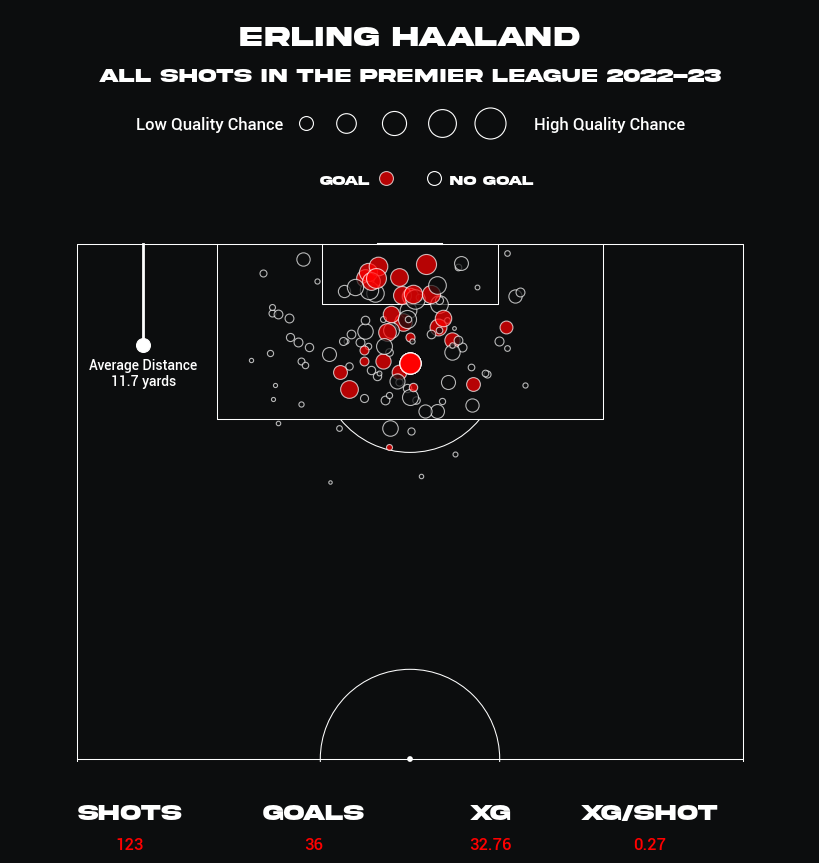

In [15]:
# create a subplot with 3 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# main title text
ax1.text(
    x=0.5, 
    y=.85, 
    s='Erling Haaland', 
    fontsize=20, 
    fontproperties=title_font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)
# subtitle text
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'All shots in the Premier League 2022-23', 
    fontsize=14,
    fontweight='bold',
    fontproperties=title_font_props, 
    color='white', 
    ha='center'
)
# add legend for the shots on goal
# size of the scatter points represent xG value
ax1.text(
    x=0.25, 
    y=0.5, 
    s=f'Low Quality Chance', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='white', 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'High Quality Chance', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='white', 
    ha='center'
)

# color legend for goal and no goal
#goal
ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Goal', 
    fontsize=10, 
    fontproperties=title_font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='white', 
    linewidth=.8,
    alpha=.7
)

# no goal
ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'No Goal', 
    fontsize=10, 
    fontproperties=title_font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()

# middle row for the pitch and shots
# [left, bottom, width, height]
ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create visual for average shot distance
# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Average Distance\n{actual_average_distance:.1f} yards', 
    fontsize=10, 
    fontproperties=body_font_props, 
    color='white', 
    ha='center'
)

# plot shot locations
for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['X'], 
        x['Y'], 
        s=300 * x['xG'], # size based on xG value
        color='red' if x['result'] == 'Goal' else background_color, # color based on goal or no goal
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )
    
ax2.set_axis_off()

# Bottom row for the stats
# [left, bottom, width, height]
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.15, 
    y=.5, 
    s='Shots', 
    fontsize=16, 
    fontproperties=title_font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax3.text(
    x=0.15, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='red', 
    ha='center'
)

ax3.text(
    x=0.38, 
    y=.5, 
    s='Goals', 
    fontsize=16, 
    fontproperties=title_font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax3.text(
    x=0.38, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='red', 
    ha='center'
)

ax3.text(
    x=0.60, 
    y=.5, 
    s='xG', 
    fontsize=16, 
    fontproperties=title_font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax3.text(
    x=0.60, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='red', 
    ha='center'
)

ax3.text(
    x=0.80, 
    y=.5, 
    s='xG/Shot', 
    fontsize=16, 
    fontproperties=title_font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax3.text(
    x=0.80, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=12, 
    fontproperties=body_font_props, 
    color='red', 
    ha='center'
)

ax3.set_axis_off()

In [17]:
fig.savefig('plots/e_haaland_2022_SoG.png', facecolor=background_color, bbox_inches='tight')